In [33]:
# PIL 라이브러리 설치
!pip install pillow

# 라이브러리 호출
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [34]:
# 가위 이미지 사이즈 변환(224*224 -> 28*28) 수행

import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [35]:
# 바위 이미지 사이즈 변환(224*224 -> 28*28) 수행

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [36]:
# 보 이미지 사이즈 변환(224*224 -> 28*28) 수행

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


In [37]:
# 필요한 라이브러리 호출

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# training Data 변수 저장(백승열 코치님 데이터 3천장 이용, 각 천장)

# load_data() 함수를 이용
# 입력 이미지가 있는 폴터 위치를 받음
# 각 클래스를 가위=0, 바위=1, 보=2 로 설정할 것임

# load_data 정의
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3000   # 가위바위보 이미지 개수 총합 3000개
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화


# 딥러닝 네트워크의 입력데이터 는 (데이터 갯수, 이미지크기 x, 이미지 크기 y, 채널 수) 형태임
# 채널 수 : 컬러이므로 3 (R, G, B)
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


라벨:  0


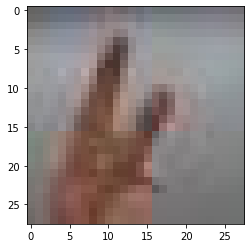

In [39]:
# 이미지 불러와 보기

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [40]:
# 데이터 크기 확인
print(len(x_train))

3000


In [41]:
# 데이터 전처리 하기
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

# 숫자 손글씨 이미지의 실제 픽셀 값은 0~255 사이의 값을 가지는 것을 확인하는 코드임

최소값: 0  최대값: 255


In [42]:
# 입력 데이터 값을 0~1 사이의 값으로 정규화
# 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0으로 나눔

x_train_norm = x_train / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [43]:
# model 만들기

# 다음 코드는 tf.keras의 Sequential API를 이용하여 
# LeNet이라는 딥러닝 네트워크를 설계

model=keras.models.Sequential()

# Conv2D 뒤에 숫자 16은 이미지 특징의 수
# input_shape 은 이미지의 형태 **** 마지막 채널은 3(RGB)으로 설정
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

# Dense 레이어의 첫 번째 인자(=32)는 뉴런의 숫자, 복잡한 문제일 수록 수를 올릴 것
model.add(keras.layers.Dense(32, activation='relu'))


# 마지막 Dense 레이어의 첫 번째 인자(=3)은 결과데이터의 클래스의 수
# 가위, 바위, 보 이므로 결과 클래수 갯수는 3개
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [44]:
# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [45]:
# 딥러닝 네트워크 학습시키기

# X_train 학습 데이터로 딥러닝 네트워크를 학습

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)
# epochs = 10 은 전체 6만개 데이터를 10번 반복 사용해서 학습을 시키라는 의미
# 실행시 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인가능



Epoch 1/10
94/94 [==============================] - 4s 43ms/step - loss: 0.9544 - accuracy: 0.5400
Epoch 2/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.7487
Epoch 3/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8357
Epoch 4/10
94/94 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8753
Epoch 5/10
94/94 [==============================] - 0s 1ms/step - loss: 0.2518 - accuracy: 0.9097
Epoch 6/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1977 - accuracy: 0.9367
Epoch 7/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1643 - accuracy: 0.9450
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.9640
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.9693
Epoch 10/10
94/94 [==============================] - 0s 1ms/step - loss: 0.0835 - accuracy: 0.9780


시험데이터(x_test)의 이미지 개수는 300 입니다.
라벨:  1


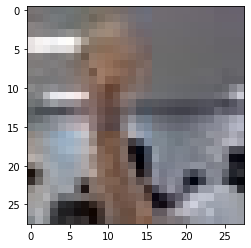

In [47]:
# test data 용 load_data_test 함수 정의
# 변호윤님 데이터 300장 이용(각 100장)
# load_data() 함수와 차이점 : 출력문 용어가 '학습데이터(x_train)' ->'시험데이터(x_test)'로 변경
def load_data_test(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("시험데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels


# test_data 불러오기
test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data_test(test_image_dir_path)


# test 데이터 이미지 확인
plt.imshow(x_test[167])
print('라벨: ', y_test[167])

In [48]:
# 성능 테스트 하기(모델 시험)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 2s - loss: 453.5454 - accuracy: 0.6200
test_loss: 453.54541015625 
test_accuracy: 0.6200000047683716


# 자신의 결과의 대한 고찰 및 내용

* 정확도가 낮게 나오는데 영향을 미칠 것 같다고 생각한 것
  - Training data의 경우 코치님께서 사전에 준비해주신 자료로 배경이 다양한데 비해
    Test data의 경우 수업 중 캠으로 촬영한 것으로 배경이 강의실로 일정함
    
  - 이미지 데이터의 해상도 자체가 28x28이어서 사람이 육안으로 이미지를 구분하기도 쉽지 
    않을 정도로 이미지의 질이 좋지 않음
    
  - model을 설계하며 사용한 함수들과 그 함수에 적용된 하이퍼파라미터의 원리에 
    대한 이해가 전혀 없이 일단 적용해보는 과정이므로 정확도가 어느정도 운에 좌우한다고     생각됨. 하이퍼파라미터 최적화에 대한 이론을 학습하여 적용한다면 결과 정확도가 
    어느정도 개선될 것이라 생각됨
